#### Overview 
First box 



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import json 
import os
from pathlib import Path

### Code at end to check/visualise data loaded for the patient
The part 'sub-008_cleaned-epo.fif' the 008 part can be changed to another subject e.g 'sub-011_cleaned-epo.fif' 
and it will start looking at that subjects cleaned data instead. 

In [20]:
cleaned_epochs_fname = '/Users/katieoreilly/Desktop/unsw/SCIF_2001_actual2.nosync/SCIF_2001/EEG_data/cleaned_data/sub-014_cleaned-epo.fif'
# Path('..') / 'EEG_data' / 'cleaned_data' / 'sub-008_cleaned-epo.fif'

epochs = mne.read_epochs(cleaned_epochs_fname, preload=True)

df = epochs.to_data_frame()

Reading /Users/katieoreilly/Desktop/unsw/SCIF_2001_actual2.nosync/SCIF_2001/EEG_data/cleaned_data/sub-014_cleaned-epo.fif ...
    Found the data of interest:
        t =       0.00 ...   30000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1437 matching events found
No baseline correction applied
0 projection items activated


### Visualising the EEG signals over a time period 
This actually allows you to see the EEG signal, you can change the range(599,600) part to show accross different epochs of time for exampel range(410,415) will visualise 5 30 second increments of data strung together into one graph. 

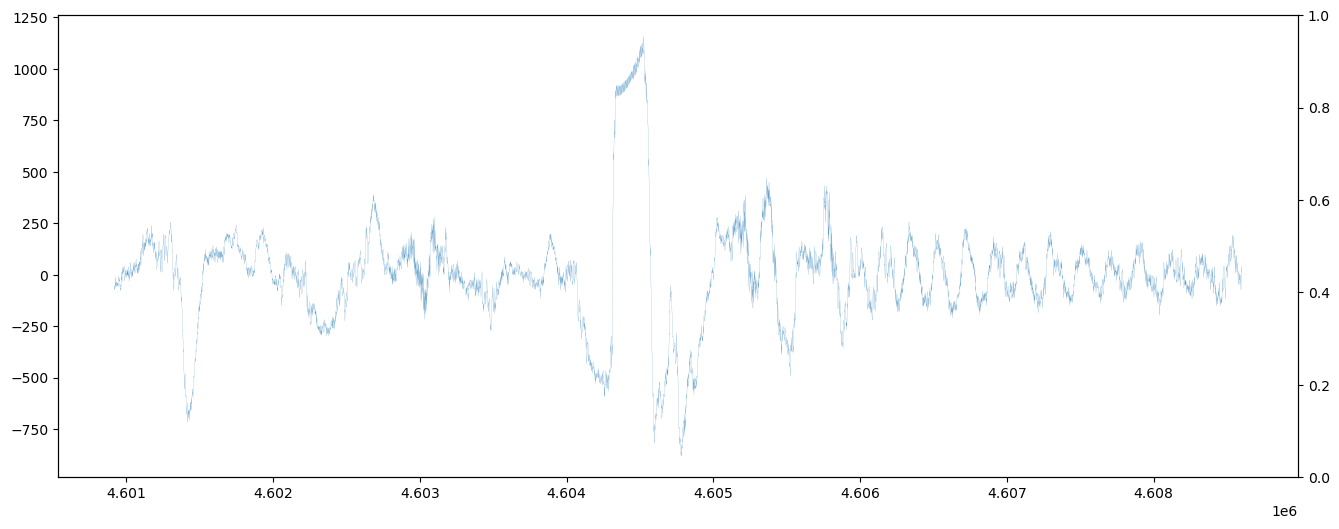

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))
axr = ax.twinx()

sub_df = df[df['epoch'].isin(range(599, 600))].copy()
# sub_df['is_wake'] = sub_df['condition'] == 'Wake'

ax.plot(sub_df['EMG2:EMG3'], lw=0.1)
# axr.plot(sub_df['is_wake'], color='red')

In [22]:
df

,time,condition,epoch,F4:A1,C4:A1,O1:A2,EOG1:A2,EOG2:A1,F3:A2,C3:A2,...,A2,O1,O2,F3,F4,EMG2:EMG3,EMG1:EMG3,F3:C3,F4:C4,EOG2:EOG1
0,0.000000,A,0,2.032879e-14,-2.371692e-14,-1.016440e-14,-6.776264e-15,4.065758e-14,0.000000,1.016440e-14,...,-1.694066e-14,1.016440e-14,8.470329e-15,1.694066e-15,6.776264e-15,6.505213e-13,2.168404e-13,-3.388132e-15,1.694066e-15,-1.355253e-14
1,0.003906,A,0,4.441733e-01,2.577153e-01,1.592687e-01,-2.318195e-01,7.661928e-01,0.343518,1.125843e-01,...,-1.101635e-01,4.910516e-02,9.882910e-03,2.333541e-01,1.298125e-01,-3.189765e+00,-3.115520e+00,2.309334e-01,1.864580e-01,7.938151e-01
2,0.007812,A,0,2.135317e-01,1.315446e-01,1.494793e-01,-2.663979e-01,6.696896e-01,0.303296,1.350191e-01,...,-1.110987e-01,3.838059e-02,1.416554e-02,1.921972e-01,2.560830e-02,2.434808e+00,2.475171e+00,1.682767e-01,8.198708e-02,8.592628e-01
3,0.011719,A,0,-4.681981e-01,-2.521887e-01,2.746998e-02,-1.657902e-01,-4.942624e-04,0.005275,9.843615e-02,...,-4.003734e-02,-1.256737e-02,1.398016e-02,-3.476257e-02,-2.341209e-01,1.364382e+01,1.356818e+01,-9.316140e-02,-2.160094e-01,4.394104e-01
4,0.015625,A,0,-7.774456e-01,-4.254852e-01,4.662695e-04,-1.689165e-01,-1.905620e-01,-0.080840,1.140763e-01,...,-3.125215e-02,-3.078589e-02,1.606755e-02,-1.120922e-01,-3.634639e-01,1.953809e+01,1.939380e+01,-1.949164e-01,-3.519603e-01,4.235883e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037592,29.984375,Wake,1436,3.691225e-02,2.034163e-01,-1.805490e+00,-1.679599e+00,-6.654116e+00,1.654473,-1.823552e+00,...,-9.613103e-01,-2.766800e+00,-2.401319e+00,6.931630e-01,2.856007e+00,-9.435648e+00,-4.567502e-01,3.478026e+00,-1.665041e-01,-1.194112e+00
11037593,29.988281,Wake,1436,-3.462155e-02,6.925997e-01,-1.257887e+00,-5.061239e-01,-4.989777e+00,1.905301,-9.724975e-01,...,-1.695062e+00,-2.952950e+00,-2.872407e+00,2.102392e-01,2.163551e+00,8.148228e+00,4.979570e+00,2.877799e+00,-7.272214e-01,-5.904184e-01
11037594,29.992188,Wake,1436,4.057083e+00,4.916160e+00,-1.678821e+00,1.086478e+01,6.480693e+00,6.483797,8.237962e+00,...,-6.122637e+00,-7.801457e+00,-8.466347e+00,3.611599e-01,-4.847519e-01,1.506183e+00,-1.135410e+01,-1.754165e+00,-8.590772e-01,-2.803283e+00
11037595,29.996094,Wake,1436,3.728068e+00,4.878546e+00,-1.836834e+00,1.138524e+01,7.532272e+00,6.527276,8.187917e+00,...,-6.639719e+00,-8.476553e+00,-9.147164e+00,-1.124438e-01,-1.042186e+00,-3.143375e+01,-2.934093e+01,-1.660641e+00,-1.150478e+00,-1.983506e+00
